In [1]:
import pandas
import numpy as np
import seaborn as sns
#подключение библиотек

Датасет 2liver.csv содержит информацию о заболеваемости печени.
Столбцы хранят такую информацию, как:

1.	Возраст пациента
2.	Пол пациента
3.	Общий билирубин
4.	Прямой билирубин
5.	Щелочная фосфатаза
6.	Аламиноаминотрансфераза
7.	Аспартатаминотрансфераза
8.	Всего белков
9.	Альбумин
10.	Соотношение альбуминов и глобулинов
11.	Цель: поле, используемое для разделения данных на два набора (пациент с заболеванием печени или без заболевания).

Вывод первых 20 строк набора данных осуществляется с помощью функции head() библиотеки pandas.

In [2]:
df = pandas.read_csv('C:\\Users\\Alina\\Downloads\\2liver.csv',index_col=0)
#полученые данных из файла с датасетом в переменнную df
display(df.head(20))
#вывод первых 20 значений датасета

,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset123
Age,,,,,,,,,,
65,Female,0.7,0.1,187.0,16,18,6.8,3.3,0.90,1
62,Male,10.9,5.5,699.0,64,100,7.5,3.2,0.74,1
62,Male,7.3,4.1,490.0,60,68,7.0,3.3,0.89,1
58,Male,1.0,0.4,182.0,14,20,6.8,3.4,1.00,1
72,Male,3.9,2.0,195.0,27,59,7.3,2.4,0.40,1
46,Male,1.8,0.7,208.0,19,14,7.6,4.4,1.30,1
26,Female,0.9,0.2,154.0,16,12,7.0,3.5,1.00,1
29,Female,0.9,0.3,202.0,14,11,6.7,3.6,1.10,1
17,Male,0.9,0.3,202.0,22,19,7.4,4.1,1.20,2


Предметной областью анализа является набор данных с биомедицинской информацией о заболевании печени. В датасете содержатся результаты анализов, показывающие состояние печени пациента, на основании которых сделаны выводы о том, что человек болен или здоров.

In [3]:
df.info()
#оценка данных и пропущенных значений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 65 to 40
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      587 non-null    object 
 1   TotalBilirubin              585 non-null    float64
 2   Direct_Bilirubin            587 non-null    float64
 3   Alkaline_Phosphotase        586 non-null    float64
 4   Alamine_Aminotransferase    587 non-null    int64  
 5   Aspartate_Aminotransferase  587 non-null    object 
 6   Total_Protiens              587 non-null    float64
 7   Albumin                     587 non-null    float64
 8   Albumin_and_Globulin_Ratio  583 non-null    float64
 9   Dataset123                  587 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 50.4+ KB


По результатам использования метода info() для оценки данных можно сделать вывод, что столбец TotalBilirubin, Alkaline_Phosphotase и Albumin_and_Globulin_Ratio имеют пропущенные значения, а значения столбеца Dataset123 и Aspartate_Aminotransferase имеют неправильный тип данных.

In [4]:
df.columns
#названия столбцов для проверки на корректность

Index(['Gender', 'TotalBilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'Dataset123'],
      dtype='object')

Названия данных столбцов не точно отображают содержимое данных столбцов, а также, для наглядности необходимо, чтобы названия были указаны в змеином регистре, поэтому для изменений названий нужно воспользоваться методом rename().

In [5]:
df = df.rename(columns={'Age':'age', 'Gender': 'gender', 'TotalBilirubin': 'total_bilirubin', 'Direct_Bilirubin': 'direct_bilirubin', 
                        'Alkaline_Phosphotase':'alkaline_phosphotase','Alamine_Aminotransferase': 'alamine_aminotransferase',
                        'Aspartate_Aminotransferase': 'aspartate_aminotransferase','Total_Protiens': 'total_protiens',
                        'Albumin': 'albumin','Albumin_and_Globulin_Ratio': 'albumin_and_globulin_ratio', 
                        'Dataset123': 'healthy'})
#изменение названая столбцов

Далее требуется проверить изменения в названии столбцов методом columns.

In [6]:
df.columns
#названия столбцов для проверки на корректность

Index(['gender', 'total_bilirubin', 'direct_bilirubin', 'alkaline_phosphotase',
       'alamine_aminotransferase', 'aspartate_aminotransferase',
       'total_protiens', 'albumin', 'albumin_and_globulin_ratio', 'healthy'],
      dtype='object')

Проверка пропущенных значений осуществляется с помощью метода isna(), а isna().sum() находит сумму пропущенных значений по столбцам.

In [7]:
print(df.isna().sum())
#сумма пропущенных значений по столбцам

gender                        0
total_bilirubin               2
direct_bilirubin              0
alkaline_phosphotase          1
alamine_aminotransferase      0
aspartate_aminotransferase    0
total_protiens                0
albumin                       0
albumin_and_globulin_ratio    4
healthy                       0
dtype: int64


Нужно удалить все строки со значениями NaN, используя метод dropna(), который удаляет все строки со значениями NaN.  Удаление данных не повлияет на итоговые значения анализа, так как пропущенные значения являются незначительной долей данных в датасете.

In [8]:
df = df.dropna()
#удаление отсутствующих значений
print(df.isna().sum())
#проверка наличия отсутствующих значений

gender                        0
total_bilirubin               0
direct_bilirubin              0
alkaline_phosphotase          0
alamine_aminotransferase      0
aspartate_aminotransferase    0
total_protiens                0
albumin                       0
albumin_and_globulin_ratio    0
healthy                       0
dtype: int64


Сумма пропущенных значений по всем столбцам равна нулю, что означает, что все пропущенные значения были удалены. 

Также необходимо проверить данные на наличие дубликатов, используя метод duplicated().sum() 

In [9]:
print(df.duplicated().sum())
#проверка наличия дубликатов

15


Так как дубликаты присутствуют, необходимо их удалить с помощью метода drop_duplicates(). Удаление данных не повлияет на итоговые значения анализа, так как дубликаты являются незначительной долей данных в датасете (доля 0.025 от всего датасета). 

In [10]:
df = df.drop_duplicates()
#удаление дубликатов
print(df.duplicated().sum())
#проверка наличия дубликатов после удаления

0


Удаление выполнено успешно, так как повторяющихся данных не осталось. После удаления строчек нужно обновить индексацию, чтобы в ней не осталось пропусков, используя метод reset_index(). Он создаст новый датафрейм, где индексы исходного датафрейма станут новой колонкой с названием index и все строки получат обычные индексы, но уже без пропусков.

In [11]:
df = df.drop_duplicates().reset_index()
#обновление индексации

Далее необходимо воспользоваться методом info() для проверки корректности типов данных по столбцам.

In [12]:
df.info()
#проверка типов данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         565 non-null    int64  
 1   gender                      565 non-null    object 
 2   total_bilirubin             565 non-null    float64
 3   direct_bilirubin            565 non-null    float64
 4   alkaline_phosphotase        565 non-null    float64
 5   alamine_aminotransferase    565 non-null    int64  
 6   aspartate_aminotransferase  565 non-null    object 
 7   total_protiens              565 non-null    float64
 8   albumin                     565 non-null    float64
 9   albumin_and_globulin_ratio  565 non-null    float64
 10  healthy                     565 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 48.7+ KB


По результатам проверки можно сделать вывод, что некоторые колонки имеют неправильный тип данных, который необходимо изменить для упрощения дальнейшей работы с данными. Для замены типа данных нужно воспользоваться методом astype().

Столбец 'aspartate_aminotransferase' имеет строковый тип данных, который невозможно изменить из-за некорректного значения в одной из строк. Для этого значение нужно изменить с помощью метода replace(). Аналогично столбец 'healthy' вместо числовых значений в одной из строк содержит значение 'yes'.


In [13]:
df['aspartate_aminotransferase'] = df['aspartate_aminotransferase'].replace('3a4', '34')
df['healthy'] = df['healthy'].replace('yes', '1')
#обработка некорректного значения данных

Теперь строковый тип данных можно изменить на числовой без ошибок.

In [14]:
df['aspartate_aminotransferase'] = df['aspartate_aminotransferase'].astype('int')
df['healthy'] = df['healthy'].astype('int')
#изменеие типов данных
df.info()
#проверка типов данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         565 non-null    int64  
 1   gender                      565 non-null    object 
 2   total_bilirubin             565 non-null    float64
 3   direct_bilirubin            565 non-null    float64
 4   alkaline_phosphotase        565 non-null    float64
 5   alamine_aminotransferase    565 non-null    int64  
 6   aspartate_aminotransferase  565 non-null    int32  
 7   total_protiens              565 non-null    float64
 8   albumin                     565 non-null    float64
 9   albumin_and_globulin_ratio  565 non-null    float64
 10  healthy                     565 non-null    int32  
dtypes: float64(6), int32(2), int64(2), object(1)
memory usage: 44.3+ KB


Осуществить поиск неявных дубликатов можно с помощью метода unique().

In [15]:
for i in range(1, 11):
    a = df.columns[i]
    if df.dtypes[i] == 'object':
        print(df[a].unique())
#поиск неявных дубликатов по строковым значениям

['Female' 'Male' 'Mal']


Найдены неявные дубликаты 'Male' и 'Mal', необходимо отредактировать опечатку для получения корректных данных.

In [16]:
df['gender'] = df['gender'].replace('Mal', 'Male')
#обработка некорректного значения данных

Необходимо убедиться в отсутсвии неявных дубликатов.

In [17]:
for i in range(1, 11):
    a = df.columns[i]
    if df.dtypes[i] == 'object':
        print(df[a].unique())
#проверка наличия неявных дубликатов после обработки

['Female' 'Male']


Так как дубликаты найдены не были, можно приступать к созданию точечной диаграммы. Для этого необходимо создание двух новых датафреймов для большей наглядности матриц диаграмм рассеяния. 

In [18]:
new1_df = df.drop(columns = ['total_bilirubin', 'direct_bilirubin', 'alkaline_phosphotase','alamine_aminotransferase'], axis = 1)
new2_df = df.drop(columns = ['aspartate_aminotransferase', 'total_protiens', 'albumin','albumin_and_globulin_ratio'], axis = 1)
#создание двух новых датафреймов для большей наглядности матриц диаграмм рассеяния

В pandas есть специальный метод для создания точечной диаграммы: pd.plotting.scatter_matrix(). 

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='aspartate_aminotransferase', ylabel='Age'>,
        <AxesSubplot:xlabel='total_protiens', ylabel='Age'>,
        <AxesSubplot:xlabel='albumin', ylabel='Age'>,
        <AxesSubplot:xlabel='albumin_and_globulin_ratio', ylabel='Age'>,
        <AxesSubplot:xlabel='healthy', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='aspartate_aminotransferase'>,
        <AxesSubplot:xlabel='aspartate_aminotransferase', ylabel='aspartate_aminotransferase'>,
        <AxesSubplot:xlabel='total_protiens', ylabel='aspartate_aminotransferase'>,
        <AxesSubplot:xlabel='albumin', ylabel='aspartate_aminotransferase'>,
        <AxesSubplot:xlabel='albumin_and_globulin_ratio', ylabel='aspartate_aminotransferase'>,
        <AxesSubplot:xlabel='healthy', ylabel='aspartate_aminotransferase'>],
       [<AxesSubplot:xlabel='Age', ylabel='total_protiens'>,
        <AxesSubplot:xlabel='aspartate_aminotransferase', ylabel='tot

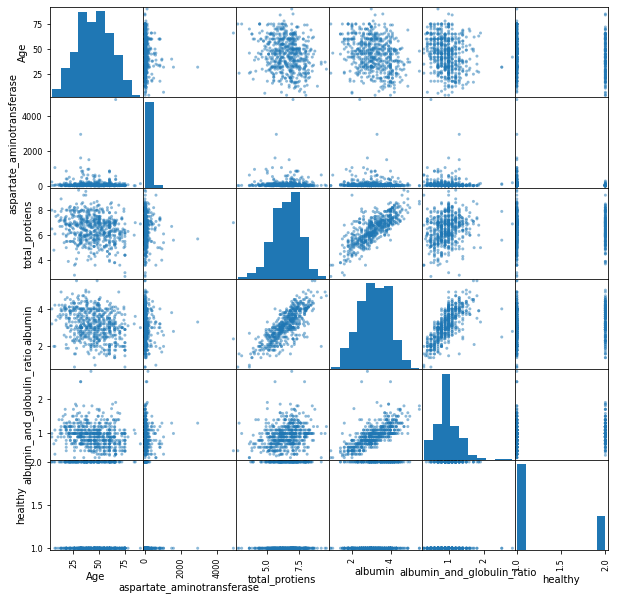

In [19]:
pandas.plotting.scatter_matrix(new1_df, figsize=(10, 10))
# матрица диаграммы рассеяния по параметрам 'Возраст пациента', 'Аспартатаминотрансфераза', 
# 'Всего белков', 'Альбумин', 'Соотношение альбуминов и глобулинов' и целевому параметру здоровья.

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='total_bilirubin', ylabel='Age'>,
        <AxesSubplot:xlabel='direct_bilirubin', ylabel='Age'>,
        <AxesSubplot:xlabel='alkaline_phosphotase', ylabel='Age'>,
        <AxesSubplot:xlabel='alamine_aminotransferase', ylabel='Age'>,
        <AxesSubplot:xlabel='healthy', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='total_bilirubin'>,
        <AxesSubplot:xlabel='total_bilirubin', ylabel='total_bilirubin'>,
        <AxesSubplot:xlabel='direct_bilirubin', ylabel='total_bilirubin'>,
        <AxesSubplot:xlabel='alkaline_phosphotase', ylabel='total_bilirubin'>,
        <AxesSubplot:xlabel='alamine_aminotransferase', ylabel='total_bilirubin'>,
        <AxesSubplot:xlabel='healthy', ylabel='total_bilirubin'>],
       [<AxesSubplot:xlabel='Age', ylabel='direct_bilirubin'>,
        <AxesSubplot:xlabel='total_bilirubin', ylabel='direct_bilirubin'>,
        <AxesSubplot:xlabel='direct_bilirubin', ylabel

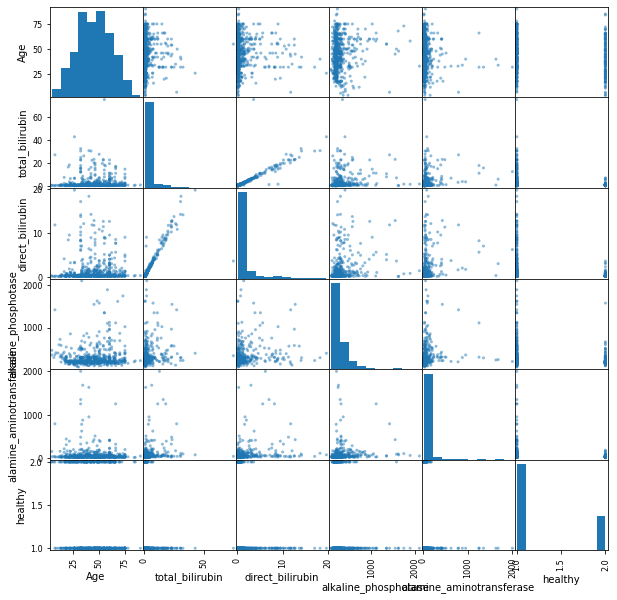

In [20]:
pandas.plotting.scatter_matrix(new2_df, figsize=(10, 10))
# матрица диаграммы рассеяния по параметрам 'Возраст пациента', 'Общий билирубин', 'Прямой билирубин'
# 'Щелочная фосфатаза', 'Аламиноаминотрансфераза' и целевому параметру здоровья.

Для проверки корреляции значений необходимо воспользоваться методом corr().

Результатом метода corr() является таблица с большим количеством чисел, которые показывают, насколько хорошо связаны отношения между двумя столбцами. Число варьируется от -1 до 1.

1 означает, что существует отношение 1 к 1 (идеальная корреляция), и для этого набора данных каждый раз, когда значение в первом столбце увеличивалось, другое значение также увеличивалось и 0,9 также является хорошим соотношением, и если будет увеличено одно значение, то, вероятно, увеличится и другое.

-0,9 будет таким же хорошим соотношением, как и 0,9, но если будет увеличено одно значение, другое, вероятно, уменьшится.

In [21]:
df.corr()
#проверка корреляции значений 

,Age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,healthy
Age,1.000000,0.010895,0.006436,0.082257,-0.084569,-0.017416,-0.195997,-0.272476,-0.219631,-0.134237
total_bilirubin,0.010895,1.000000,0.873981,0.205530,0.216761,0.238169,-0.007713,-0.224492,-0.209099,-0.223277
direct_bilirubin,0.006436,0.873981,1.000000,0.234002,0.236702,0.257961,0.000057,-0.231269,-0.203059,-0.249596
alkaline_phosphotase,0.082257,0.205530,0.234002,1.000000,0.126414,0.167017,-0.026808,-0.163602,-0.234983,-0.182355
alamine_aminotransferase,-0.084569,0.216761,0.236702,0.126414,1.000000,0.791745,-0.034721,-0.027548,-0.007708,-0.160982
aspartate_aminotransferase,-0.017416,0.238169,0.257961,0.167017,0.791745,1.000000,-0.021689,-0.085348,-0.073984,-0.150293
total_protiens,-0.195997,-0.007713,0.000057,-0.026808,-0.034721,-0.021689,1.000000,0.784934,0.234724,0.035429
albumin,-0.272476,-0.224492,-0.231269,-0.163602,-0.027548,-0.085348,0.784934,1.000000,0.686008,0.164689
albumin_and_globulin_ratio,-0.219631,-0.209099,-0.203059,-0.234983,-0.007708,-0.073984,0.234724,0.686008,1.000000,0.172018
healthy,-0.134237,-0.223277,-0.249596,-0.182355,-0.160982,-0.150293,0.035429,0.164689,0.172018,1.000000


По результатам таблицы можно сделать вывод, что данные столбцов 'Общий билирубин' и 'Прямой билирубин' имеют прямую корреляционную связь. Также 'Аламиноаминотрансфераза' и 'Аспартатаминотрансфераза', 'Альбумин' и 'Соотношение альбуминов и глобулинов' имеют прямую зависимость. И 'общее количество белков' имеют корреляцию с 'Альбумином'.

Тепловая карта корреляции строится с помощью метода heatmap() библиотеки seaborn. Аргумент annot=True помогает отобразить коэффициент корреляции.

<AxesSubplot:>

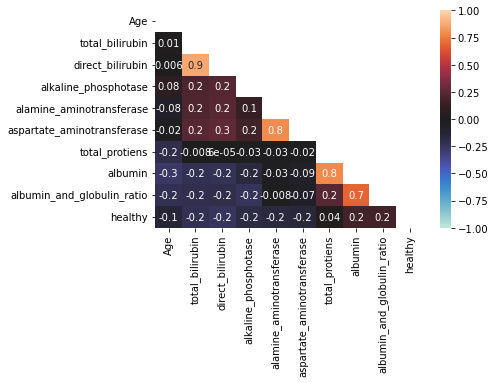

In [22]:
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, fmt='.1g', mask=matrix, vmin=-1, vmax=1, center= 0)
#создание тепловой карты корреляции

Результаты тепловой карты совпали в выводами по таблице, но сделали значения более наглядными.

Целевым признаком является наличие или отсутствие болезни печени. Для оценки ковариации между столбцом здоровья и остальными необходимо использовать метод cov() с параметрами здоровья и всех числовых столбцов. 

In [23]:
max_cov = 0
name_coloumn = ''
for i in df:
    if df.dtypes[i] != 'object':
        a = np.cov(df[str(i)], df['healthy'])[0][1]
        if abs(int(a)) > abs(max_cov):
            max_cov = a
            name_coloumn = i
        print(a, i)
print('Максильное значение ковариации:', max_cov, 'столбца:', name_coloumn)
#поиск максимального значения ковариации

-0.9874066403062829 Age
-0.6347483210945835 total_bilirubin
-0.3207151823259903 direct_bilirubin
-20.25128663779577 alkaline_phosphotase
-13.251098349337854 alamine_aminotransferase
-19.833628318584076 aspartate_aminotransferase
0.017421703382915953 total_protiens
0.059129793510324456 albumin
0.024789524885457846 albumin_and_globulin_ratio
0.20411724094646327 healthy
Максильное значение ковариации: -20.25128663779577 столбца: alkaline_phosphotase


Таким образом, наибольшую обратную ковариацию со здоровьем имеют параметры Аламиноаминотрансфераза (alkaline_phosphotase) и Аспартатаминотрансфераза (aspartate_aminotransferase). То есть при высоких параметрах аламиноаминотрансферазы и аспартатаминотрансферазы - с большей вероятностью, чем при увеличении других параметров, у человека будет заболевание печени. Поэтому можно сделать вывод, что это параметры, которые наибольшим образом влияют на заболевание печени.

Подводя итоги, можно сделать вывод, что данные столбцов 'Общий билирубин' и 'Прямой билирубин', 'Аламиноаминотрансфераза' и 'Аспартатаминотрансфераза', 'Альбумин' и 'Соотношение альбуминов и глобулинов', 'Общее количество белков' и 'Альбумин' имеют прямую корреляционную связь, что означает, что данные параметры попарно взаимосвязаны - при росте (уменьшении) одного из параметров второй будет увеличиваться (уменьшаться) соответственно.
На целевой признак параметр заболевания печени влияют показатели Аламиноаминотрансферазы и Аспартатаминотрансферазы, то есть, если данные показатели выше нормы, то, скорее всего, у человека имеется заболевание печени.